# Code associated with *Comment: Tonian paleomagnetic poles from South China are consistent with progressive tectonic motion over the North Pole*

This code conducts E/I analysis and incorporates uncertainties associated with inclination shallowing into Tonian paleomagnetic poles from South China.

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

import cartopy.crs as ccrs
import xml.etree.ElementTree as ET
from paleogeo_functions import *

## Import and plot Jing et al. 2025 directions

Measurement level data were not provided by the authors associated with the publication. Directions in tilt-corrected coordinates resulting from specimen-level fits were provided in Table S1. These directions are imported below.

In [2]:
Jing2025_lat = 29.10
Jing2025_lon = 102.84

Jing_directions = pd.read_csv("./data/Jing2025_directions.csv")
Jing_directions.head()

,sample,declination,inclination,strat_level,MAD
0,SL181,288.0,-33.8,100.0,9.2
1,SL182,317.6,-41.5,100.1,3.5
2,SL183,314.1,-38.9,100.2,5.5
3,SL184,315.9,-36.5,100.3,5.0
4,SL185,330.8,-42.9,102.0,0.5


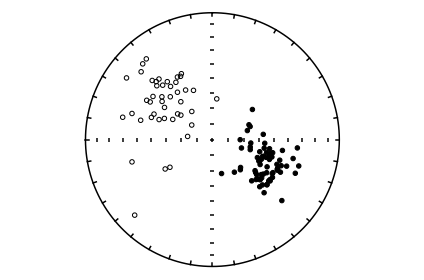

In [3]:
ipmag.plot_net()
ipmag.plot_di(Jing_directions['declination'], Jing_directions['inclination'])

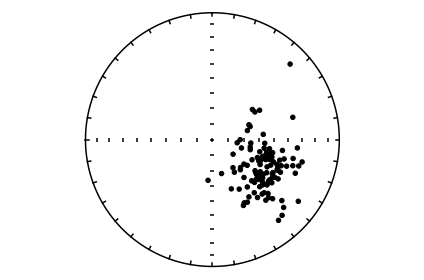

In [4]:
Jing_directions_unified = np.array(pmag.flip(ipmag.make_di_block(Jing_directions['declination'], Jing_directions['inclination']), 
                                              combine=True))
ipmag.plot_net()
ipmag.plot_di(di_block= Jing_directions_unified)

## Apply E/I analysis to the Jing et al. 2025 data

We can apply E/I analysis to the Jing et al. 2025 data and then use the confidence bounds on the f-factor to calculate a pole that incorporates such uncertainty.

Bootstrapping.... be patient



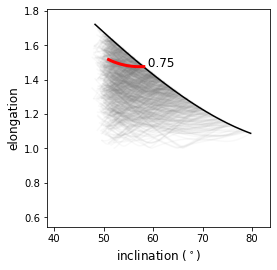

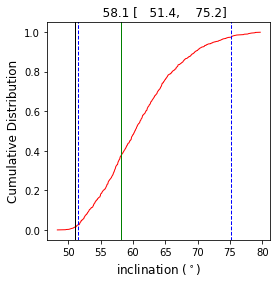

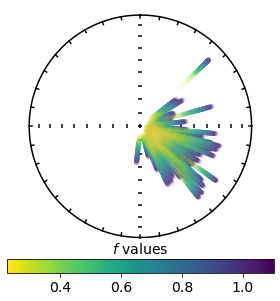

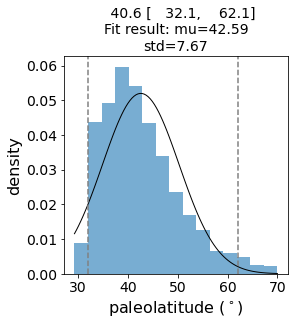

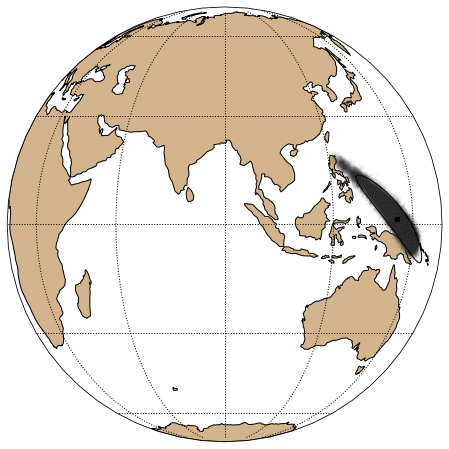

The original inclination was: 51.0

The corrected inclination is: 58.12
with bootstrapped confidence bounds of: 51.42 to 75.23
and elongation parameter of: 1.48
The flattening factor is: 0.75
with bootstrapped confidence bounds of: 0.99 to 0.33

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 142.5  Plat: 1.5
Major axis lon: 51.2  Major axis lat: 39.6
Minor axis lon: 234.3  Minor axis lat: 50.3
Major axis angle of 95% ellipse (Zeta): 18.0
Minor axis angle of 95% ellipse (Eta): 3.4
Number of directions in mean (n): 100000


In [5]:
Jing2025_Kent_mean_pole = ipmag.find_ei_kent(Jing_directions_unified, Jing2025_lat, Jing2025_lon, central_longitude=90)

## Chenjiang pole

Park et al. (2021) calculated a paleomagnetic pole from the site mean data published in Jing et al. 2019 in which they transformed the site mean directions to VGPs and then calculated a mean.

Plon: 74.7  Plat: 29.4
Major axis lon: 343.3  Major axis lat: 2.5
Minor axis lon: 248.9  Minor axis lat: 60.4
Major axis angle of 95% ellipse (Zeta): 17.2
Minor axis angle of 95% ellipse (Eta): 10.9
Number of directions in mean (n): 7000


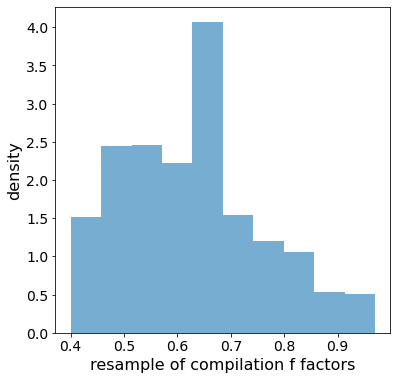

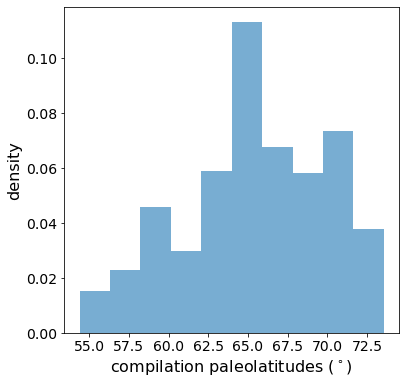

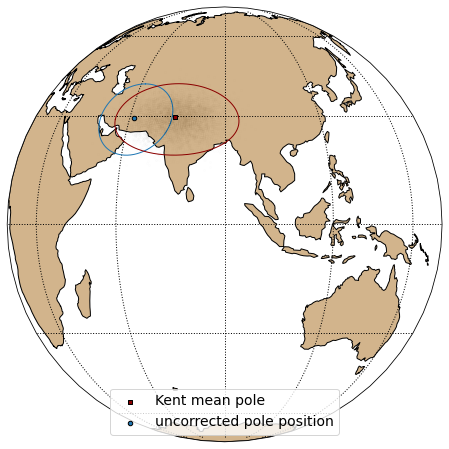

In [6]:
Chenjiang_plon = 61.5
Chenjiang_plat = 29.4
Chenjiang_A95 = 10.8
Chenjiang_lon = 102.411
Chenjiang_lat = 25.145
Chenjiang_Kent_mean = ipmag.find_compilation_kent(Chenjiang_plon, Chenjiang_plat, Chenjiang_A95, Chenjiang_lon, Chenjiang_lat,
                                                  map_central_longitude=90)

## Xiajiang pole

Plon: 103.8  Plat: 42.8
Major axis lon: 308.9  Major axis lat: 44.3
Minor axis lon: 206.0  Minor axis lat: 12.8
Major axis angle of 95% ellipse (Zeta): 14.9
Minor axis angle of 95% ellipse (Eta): 12.7
Number of directions in mean (n): 7000


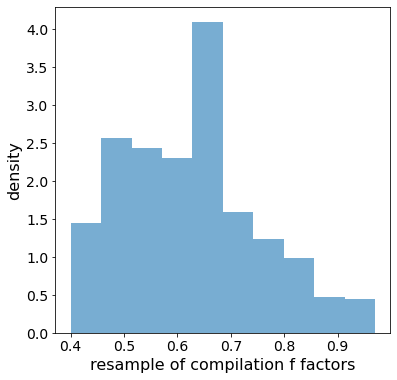

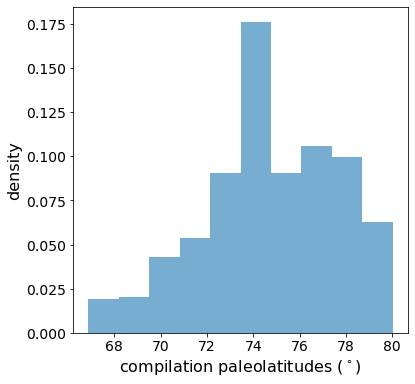

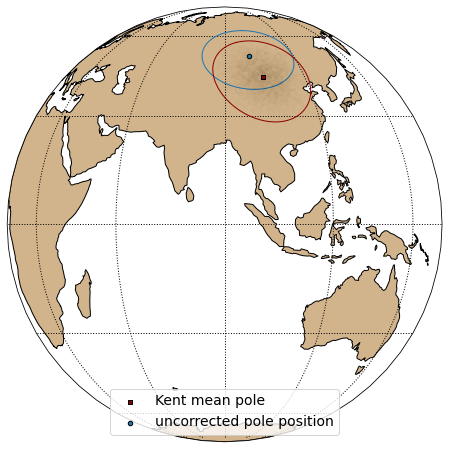

In [7]:
Xiajiang_plon = 100.0
Xiajiang_plat = 50.7
Xiajiang_A95 = 12.3
Xiajiang_lon = 108.82
Xiajiang_lat = 27.91
Xiajiang_Kent_mean = ipmag.find_compilation_kent(Xiajiang_plon, Xiajiang_plat, Xiajiang_A95, Xiajiang_lon, Xiajiang_lat,
                                                  map_central_longitude=90)

## Liantuo poles

Plon: 137.1  Plat: 24.8
Major axis lon: 38.6  Major axis lat: 17.8
Minor axis lon: 276.7  Minor axis lat: 58.8
Major axis angle of 95% ellipse (Zeta): 13.4
Minor axis angle of 95% ellipse (Eta): 8.8
Number of directions in mean (n): 7000


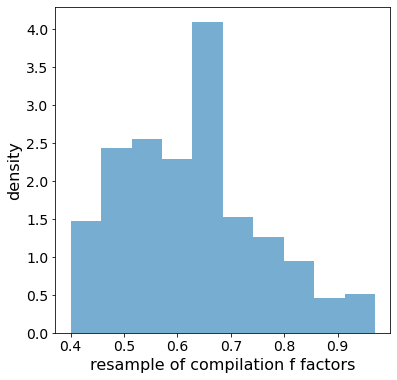

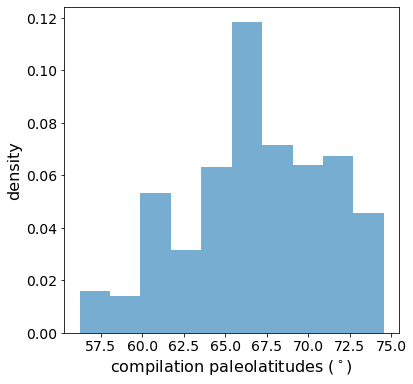

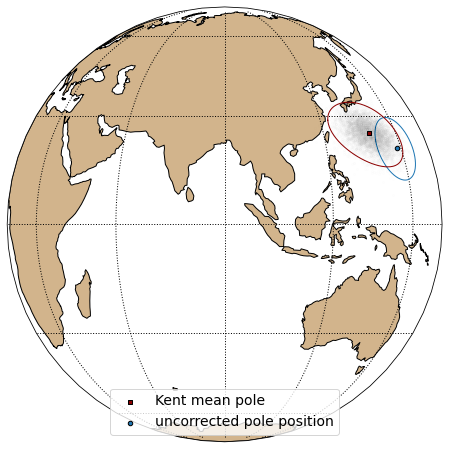

In [8]:
lower_Liantuo_plon = 148.0
lower_Liantuo_plat = 20.6
lower_Liantuo_A95 = 8.8
lower_Liantuo_lat = 30.8
lower_Liantuo_lon = 111.1
lower_Liantuo_Kent_mean = ipmag.find_compilation_kent(lower_Liantuo_plon, lower_Liantuo_plat, lower_Liantuo_A95, lower_Liantuo_lon, lower_Liantuo_lat,
                                                  map_central_longitude=90)

Plon: 144.1  Plat: 19.9
Major axis lon: 44.3  Major axis lat: 25.1
Minor axis lon: 268.0  Minor axis lat: 57.0
Major axis angle of 95% ellipse (Zeta): 14.1
Minor axis angle of 95% ellipse (Eta): 5.3
Number of directions in mean (n): 7000


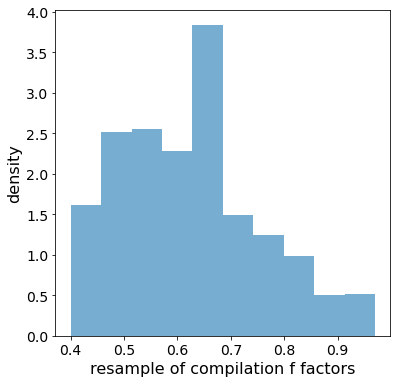

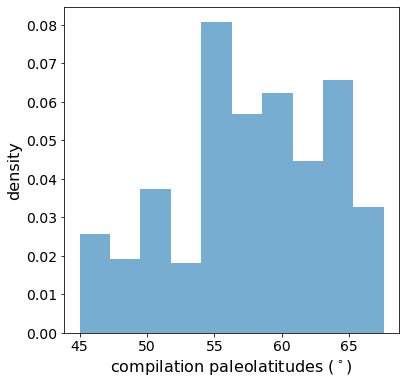

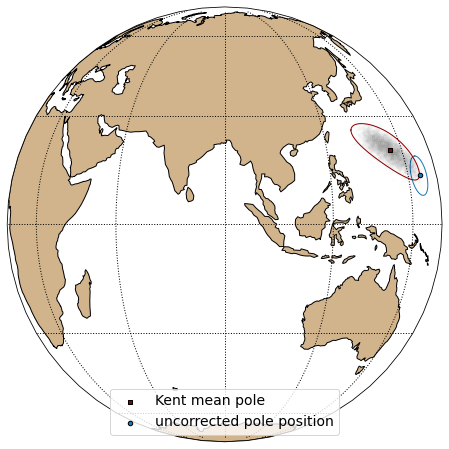

In [9]:
upper_Liantuo_plon = 157.1
upper_Liantuo_plat = 13.0
upper_Liantuo_A95 = 5.3
upper_Liantuo_lat = 30.819
upper_Liantuo_lon = 111.069
upper_Liantuo_Kent_mean = ipmag.find_compilation_kent(upper_Liantuo_plon, upper_Liantuo_plat, upper_Liantuo_A95, upper_Liantuo_lon, upper_Liantuo_lat,
                                                  map_central_longitude=90)

## Madiyi pole

Plon: 83.0  Plat: 34.2
Major axis lon: 347.4  Major axis lat: 8.2
Minor axis lon: 245.8  Minor axis lat: 54.5
Major axis angle of 95% ellipse (Zeta): 12.2
Minor axis angle of 95% ellipse (Eta): 5.2
Number of directions in mean (n): 7000


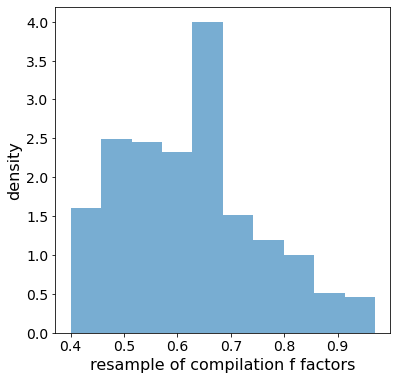

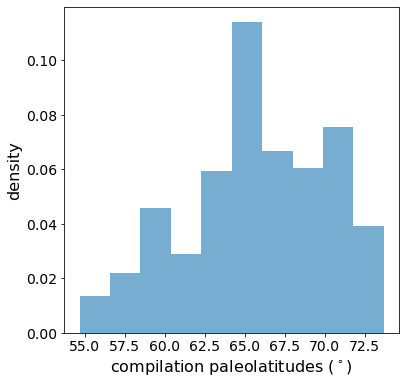

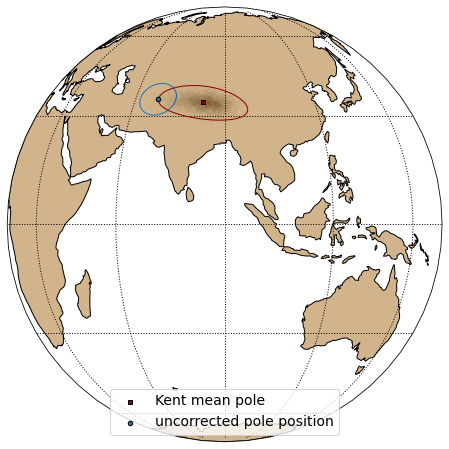

In [10]:
Madiyi_plon = 67.9
Madiyi_plat = 35.3
Madiyi_lon = 109.6
Madiyi_lat = 27.5
Madiyi_A95 = np.sqrt(4.7*5.5)

Madiyi_Kent_mean = ipmag.find_compilation_kent(Madiyi_plon, Madiyi_plat, Madiyi_A95, Madiyi_lon, Madiyi_lat,
                                                  map_central_longitude=90)

## Nantuo pole

Plon: 153.3  Plat: 14.7
Major axis lon: 57.3  Major axis lat: 21.8
Minor axis lon: 274.8  Minor axis lat: 63.2
Major axis angle of 95% ellipse (Zeta): 14.7
Minor axis angle of 95% ellipse (Eta): 4.4
Number of directions in mean (n): 7000


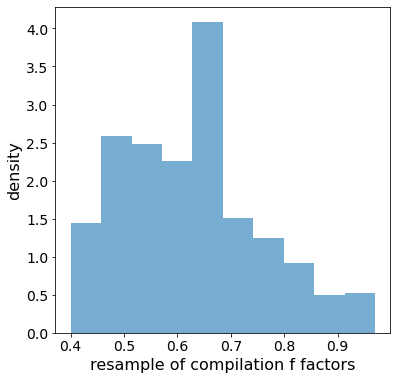

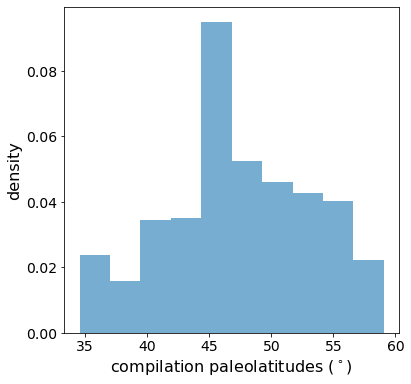

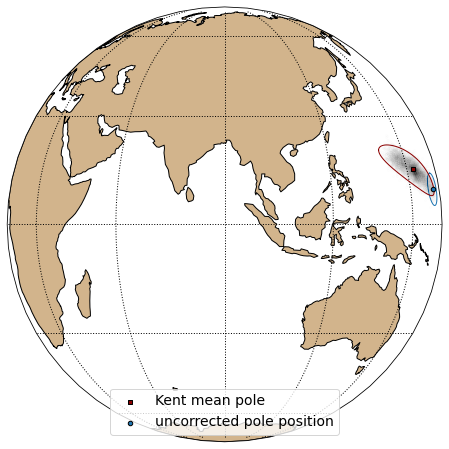

In [11]:
Nantuo_plon = 165.9
Nantuo_plat = 9.3
Nantuo_lon = 109
Nantuo_lat = 26
Nantuo_A95 = 4.3

Nantuo_Kent_mean = ipmag.find_compilation_kent(Nantuo_plon, Nantuo_plat, Nantuo_A95, Nantuo_lon, Nantuo_lat,
                                                  map_central_longitude=90)

## Xiaofeng dikes and Guzhang sills poles

In [12]:
Xiaofeng_plon = 82.1
Xiaofeng_plat = 26.1
Xiaofeng_A95 = 14.6

Guzhang_sills_plon = 116.8
Guzhang_sills_plat = 25.6
Guzhang_sills_A95 = 9.9

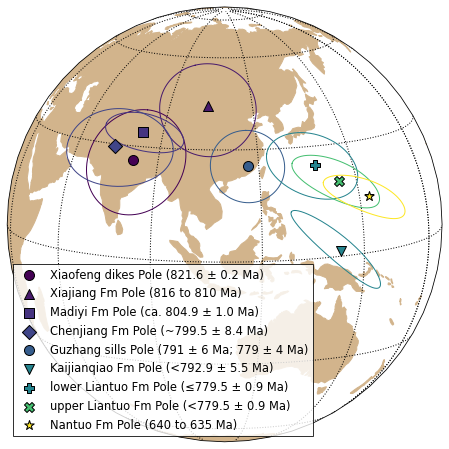

In [68]:
from matplotlib import cm, colors

pole_axis = ipmag.make_orthographic_map(central_latitude=10, central_longitude=110, land_edge_color='tan')
plt.figure(num=1,figsize=(8, 8))

Xiaofeng_age = 821.64
Xiajiang_age = 813
Madiyi_age = 804.9
Chenjiang_age = 799.5
Jing2025_age = 775
Guzhang_sills_age = 791
lower_Liantuo_age = 775
upper_Liantuo_age = 750
Nantuo_age = 640

color_map = 'viridis_r'
age_min, age_max = 720, 820
cmap = cm.get_cmap(color_map)
norm = colors.Normalize(vmin=age_min, vmax=age_max)

Xiaofeng_color = cmap(norm(Xiaofeng_age))
Xiajiang_color = cmap(norm(Xiajiang_age))
Madiyi_color = cmap(norm(Madiyi_age))
Chenjiang_color = cmap(norm(Chenjiang_age))
Jing2025_color = cmap(norm(Jing2025_age))
Guzhang_sills_color = cmap(norm(Guzhang_sills_age))
lower_Liantuo_color = cmap(norm(lower_Liantuo_age))
upper_Liantuo_color = cmap(norm(upper_Liantuo_age))
Nantuo_color = cmap(norm(Nantuo_age))


ipmag.plot_pole(pole_axis, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95, color=Xiaofeng_color, 
                label='Xiaofeng dikes Pole (821.6 ± 0.2 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Xiajiang_Kent_mean, lower=0, color=Xiajiang_color,
                        marker='^', label='Xiajiang Fm Pole (816 to 810 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Madiyi_Kent_mean, lower=0, color=Madiyi_color,
                        marker='s', label='Madiyi Fm Pole (ca. 804.9 ± 1.0 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Chenjiang_Kent_mean, lower=0, color=Chenjiang_color,
                        marker='D', label='Chenjiang Fm Pole (~799.5 ± 8.4 Ma)', markersize=100)
ipmag.plot_pole(pole_axis, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95, color=Guzhang_sills_color, 
                label='Guzhang sills Pole (791 ± 6 Ma; 779 ± 4 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Jing2025_Kent_mean_pole, lower=0, color=Jing2025_color, 
                        marker='v', label='Kaijianqiao Fm Pole (<792.9 ± 5.5 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, lower_Liantuo_Kent_mean, lower=0, color=lower_Liantuo_color, 
                        marker='P', label='lower Liantuo Fm Pole (≤779.5 ± 0.9 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, upper_Liantuo_Kent_mean, lower=0, color=upper_Liantuo_color, 
                        marker='X', label='upper Liantuo Fm Pole (<779.5 ± 0.9 Ma)', markersize=100)
ipmag.plot_pole_ellipse(pole_axis, Nantuo_Kent_mean, lower=0, color=Nantuo_color, 
                        marker='*', label='Nantuo Fm Pole (640 to 635 Ma)', markersize=100)

plt.legend(loc='lower left',fancybox=False,edgecolor='black', fontsize=11.5)
plt.savefig("./output/South_China_Tonian_poles.pdf")
plt.show()

In [20]:
rotation_times = [820, 810, 800, 790, 780, 770, 760]

rotation_colors = []
for time in rotation_times:
    rotation_colors.append(cmap(norm(time)))

South_China_Euler_820 = [-14.5,-177.6,-65.5]
South_China_Euler_810 = [-13.5, -176.99, -62.7]
South_China_Euler_800 = [-11.5,-171.1,-60.0]
South_China_Euler_790 = [-8.2,-159.8,-58.8]
South_China_Euler_780 = [-4.6,-148.6,-59.8]
South_China_Euler_770 = [-1.0,-138.1,-62.7]
South_China_Euler_760 = [1.8,-129.9,-67.2]

South_China_Eulers = [South_China_Euler_820,
                      South_China_Euler_810,
                      South_China_Euler_800,
                      South_China_Euler_790,
                      South_China_Euler_780,
                      South_China_Euler_770,
                      South_China_Euler_760]

India_Euler_820 = [1.0, 127.7, -68.0]
India_Euler_810 = [1.2, 125.9, -65.6]
India_Euler_800 = [1.1, 126.6, -58.9]
India_Euler_790 = [0.5, 130.8, -47.9]
India_Euler_780 = [-0.5, 137.3, -37.4]
India_Euler_770 = [-2.2, 148.5, -27.6]
India_Euler_760 = [-4.5, 167.7, -21]

India_Eulers = [India_Euler_820,
                India_Euler_810,
                India_Euler_800,
                India_Euler_790,
                India_Euler_780,
                India_Euler_770,
                India_Euler_760]

Oman_India_Euler = [29.99, 46.42, 52.4]
South_China_India_Euler = [-13.5927, 64.9561, 60.2324]

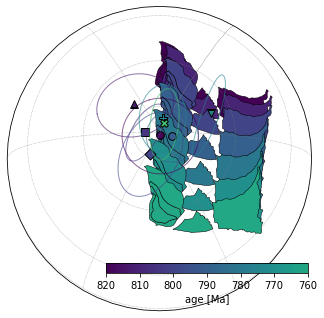

In [64]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=30, central_latitude=80,
                                 figsize=(8,8), grid_lines=False)

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)
ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

for i in range(len(South_China_Eulers)):
    craton_plot(ax, [6024], [South_China_India_Euler, India_Eulers[i]], 'k', rotation_colors[i], 1.0, 0.5)
    craton_plot(ax, [6023], [South_China_India_Euler, India_Eulers[i]], 'k', rotation_colors[i], 1.0, 0.5)
    craton_plot(ax, [602], [South_China_India_Euler, India_Eulers[i]], 'k', rotation_colors[i], 1.0, 0.5)
    craton_plot(ax, [501], [India_Eulers[i]], 'k', rotation_colors[i], 1.0, 0.5)
    craton_plot(ax, [50300], [Oman_India_Euler, India_Eulers[i]], 'k', rotation_colors[i], 1.0, 0.5)

rotated_pole_plot(ax, Xiaofeng_plon, Xiaofeng_plat, Xiaofeng_A95,
                  [South_China_Eulers[0]],
                  marker='o', s=60, marker_color=Xiaofeng_color)
rotated_pole_plot(ax, Guzhang_sills_plon, Guzhang_sills_plat, Guzhang_sills_A95,
                  [South_China_Eulers[4]],
                  marker='o', s=60, marker_color=Guzhang_sills_color)
rotated_kent_pole_plot(ax, Xiajiang_Kent_mean, [South_China_Eulers[2]],
                       marker='^', s=60, marker_color=Xiajiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Madiyi_Kent_mean, [South_China_Eulers[1]],
                       marker='s', s=60, marker_color=Madiyi_color, alpha=0.6)
rotated_kent_pole_plot(ax, Chenjiang_Kent_mean, [South_China_Eulers[1]],
                       marker='D', s=60, marker_color=Chenjiang_color, alpha=0.6)
rotated_kent_pole_plot(ax, Jing2025_Kent_mean_pole, [South_China_Eulers[6]],
                       marker='v', s=60, marker_color=Jing2025_color, alpha=0.6)
rotated_kent_pole_plot(ax, lower_Liantuo_Kent_mean, [South_China_Eulers[5]],
                       marker='P', s=60, marker_color=lower_Liantuo_color, alpha=0.6)
rotated_kent_pole_plot(ax, upper_Liantuo_Kent_mean, [South_China_Eulers[6]],
                       marker='X', s=60, marker_color=upper_Liantuo_color, alpha=0.6)

color_mapping = plt.cm.ScalarMappable(
    cmap=color_map, norm=plt.Normalize(vmin=age_min, vmax=age_max)
)
color_mapping._A = []

# Add colorbar above the plot with a white box and black outline
cbar = plt.colorbar(
    color_mapping,
    orientation="horizontal",
    shrink=0.4,
    pad=0.15,  # increase padding to move above figure
    ax=ax,
)
cbar.ax.set_xlabel("age [Ma]")

# Adjust range and invert axis
cbar.ax.set_xlim(760, 820)
cbar.ax.invert_xaxis()

# Tweak position to sit on top (fine control)
cbar.ax.set_position([0.42, 0.405, 0.35, 0.03])  # [left, bottom, width, height]
plt.savefig('./output/South_China_Tonian_poles_reconstructed.pdf')
